# Heart Disease Risk Prediction | Framingham Heart Disease data 
<hr>
<font size="3"><b> Objective: </b>To classify whether a person has a chance of developing Coronary Heart Disease in the next 10 years based on the available data </font>

### List of available data

#### Demographic: 
* Sex: male or female(Nominal) 
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 
* Education: no further information provided

#### Behavioral: 
* Current Smoker: whether or not the patient is a current smoker (Nominal) 
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

#### Information on medical history: 
* BP Meds: whether or not the patient was on blood pressure medication (Nominal) 
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 
* Diabetes: whether or not the patient had diabetes (Nominal) 

#### Information on current medical condition: 
* Tot Chol: total cholesterol level (Continuous) 
* Sys BP: systolic blood pressure (Continuous) 
* Dia BP: diastolic blood pressure (Continuous) 
* BMI: Body Mass Index (Continuous) 
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 
* Glucose: glucose level (Continuous) 

#### Target variable to predict: 
* 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

## Exploring the data

In [97]:
import numpy as np
import pandas as pd

df = pd.read_csv("framingham.csv")

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [98]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


(4238, 16)

In [99]:
#checking for duplicate rows in the data
df_duplicated = df[df.duplicated()]
df_duplicated

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [100]:
# checking for missing values
null = df[df.isna().any(axis=1)]
null

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [101]:
#missing values by column.
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### Since we have only a small number of examples with missing values, let's drop them

In [102]:
#dropping the missing values
df = df.dropna()
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [103]:
#updated dataframe
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


## Pair Plot

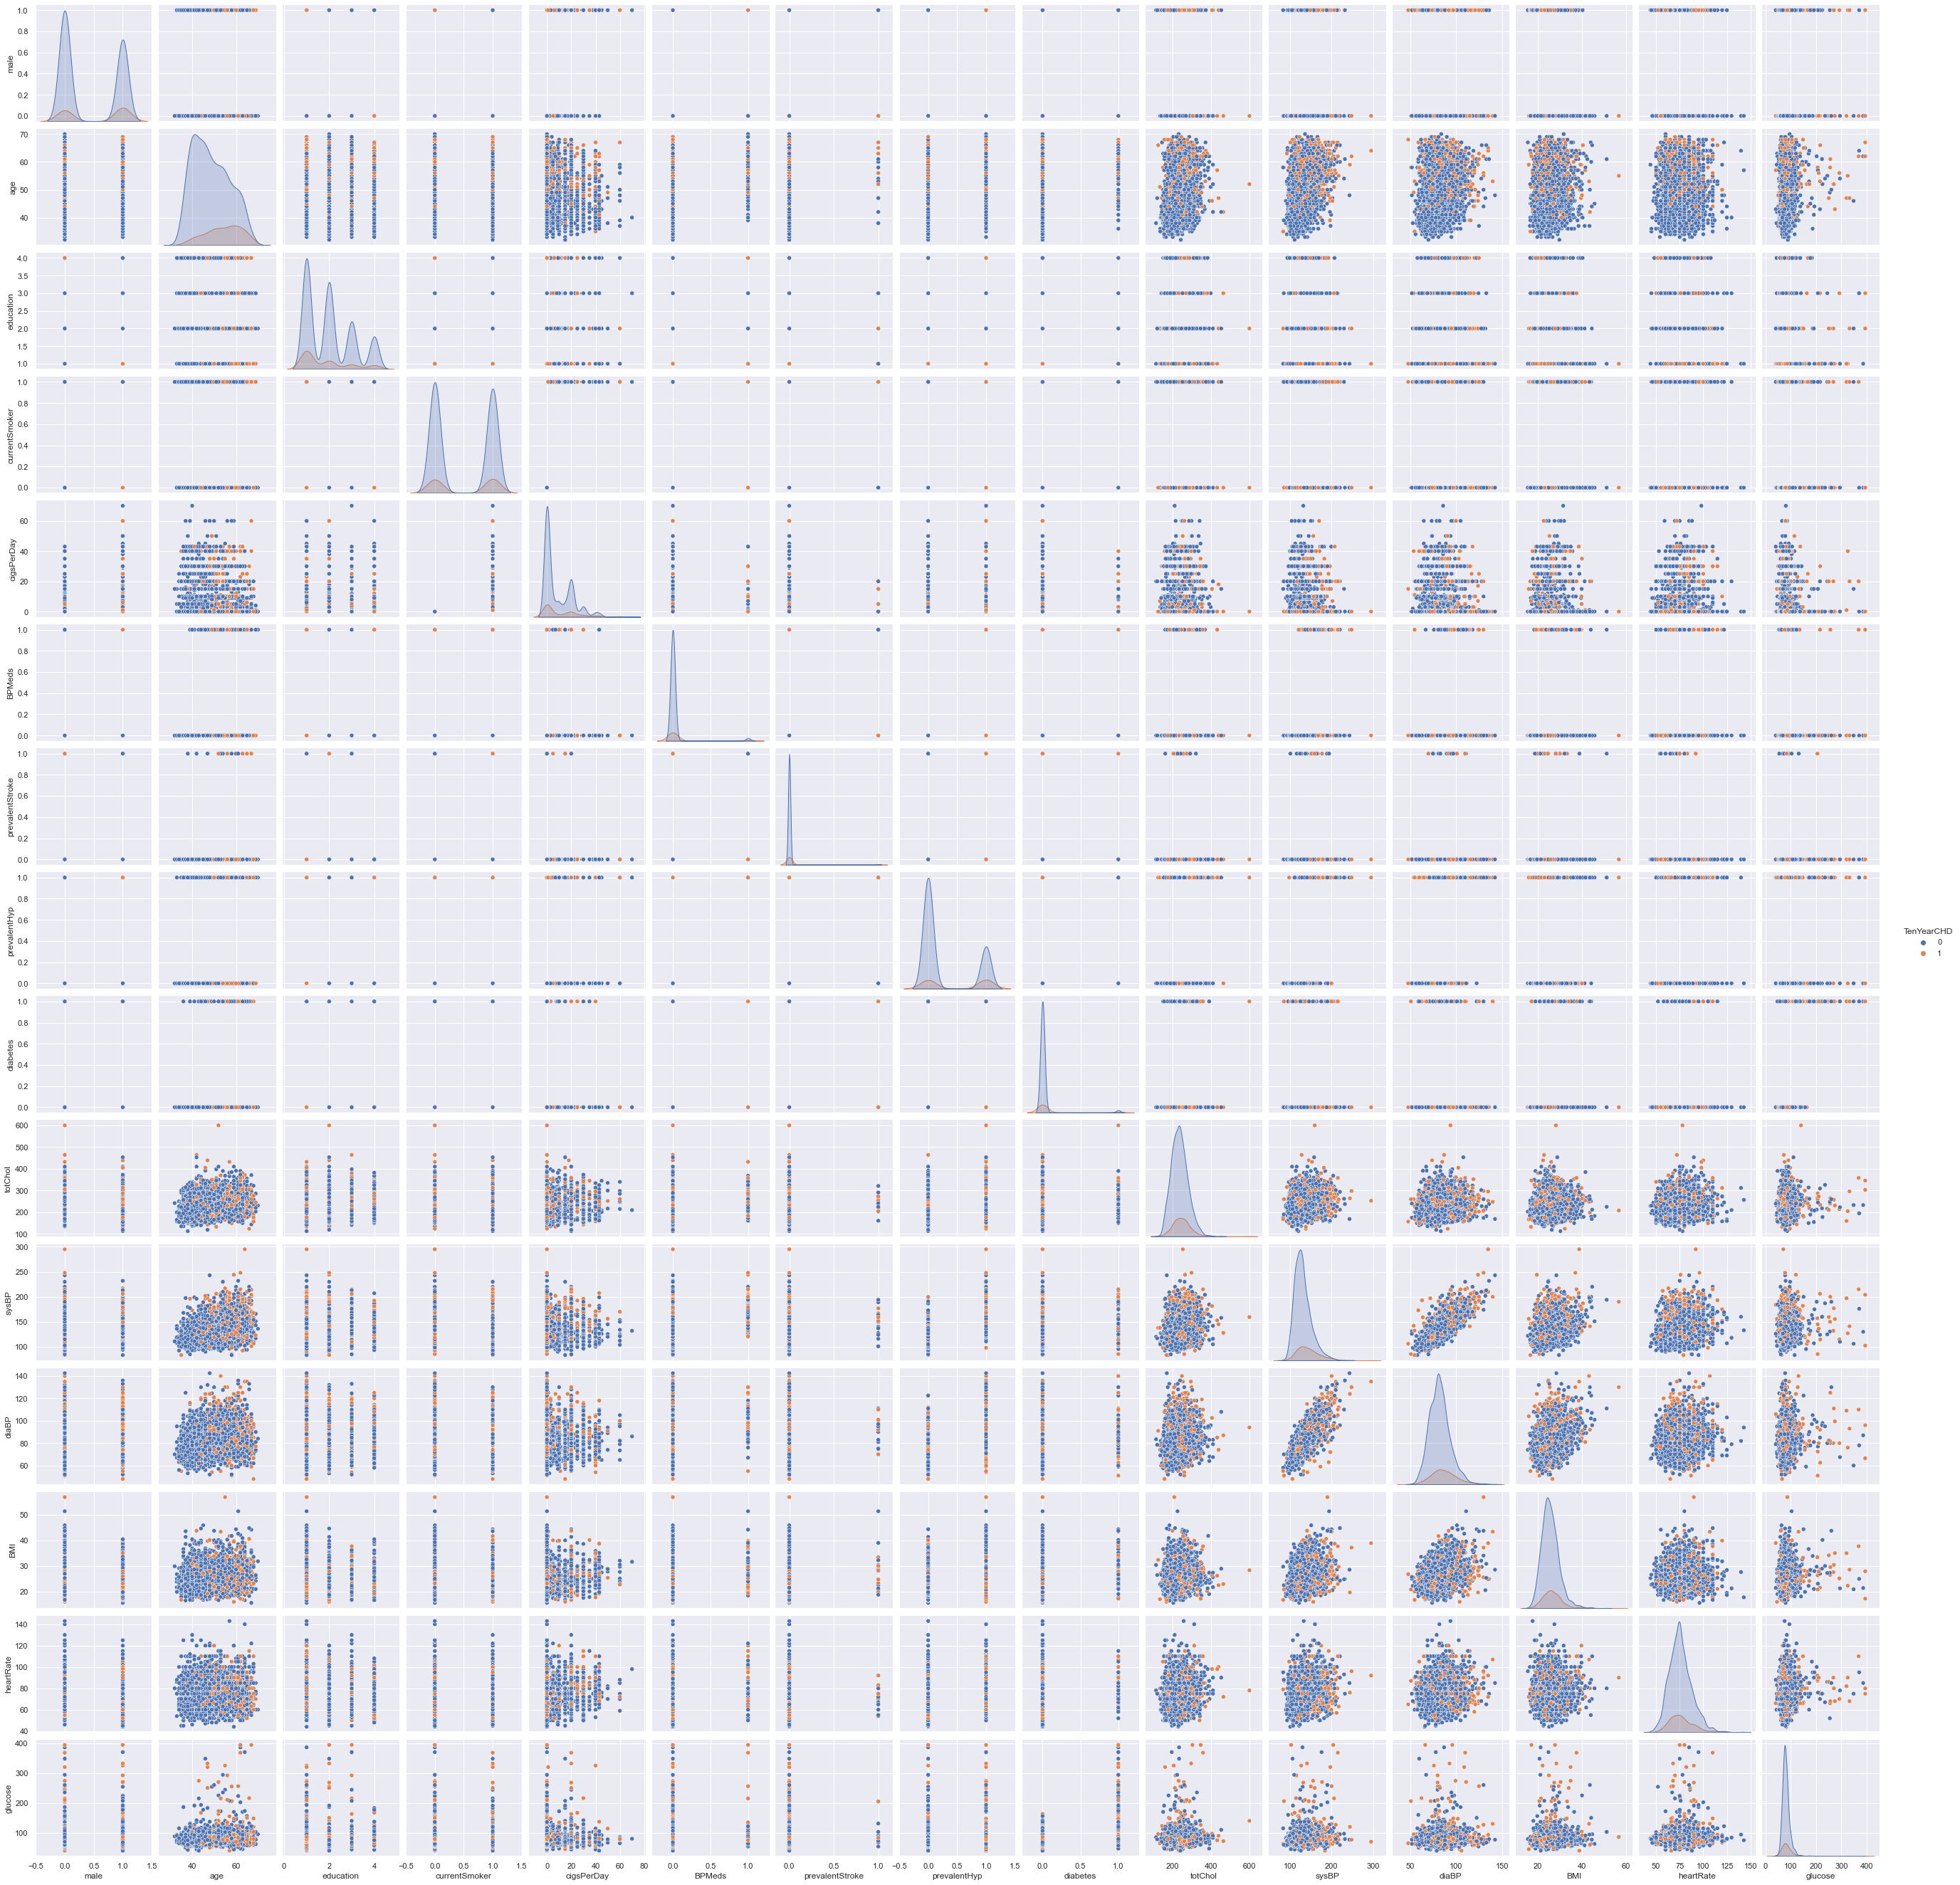

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, hue="TenYearCHD")

### Correlation Matrix

<AxesSubplot:>

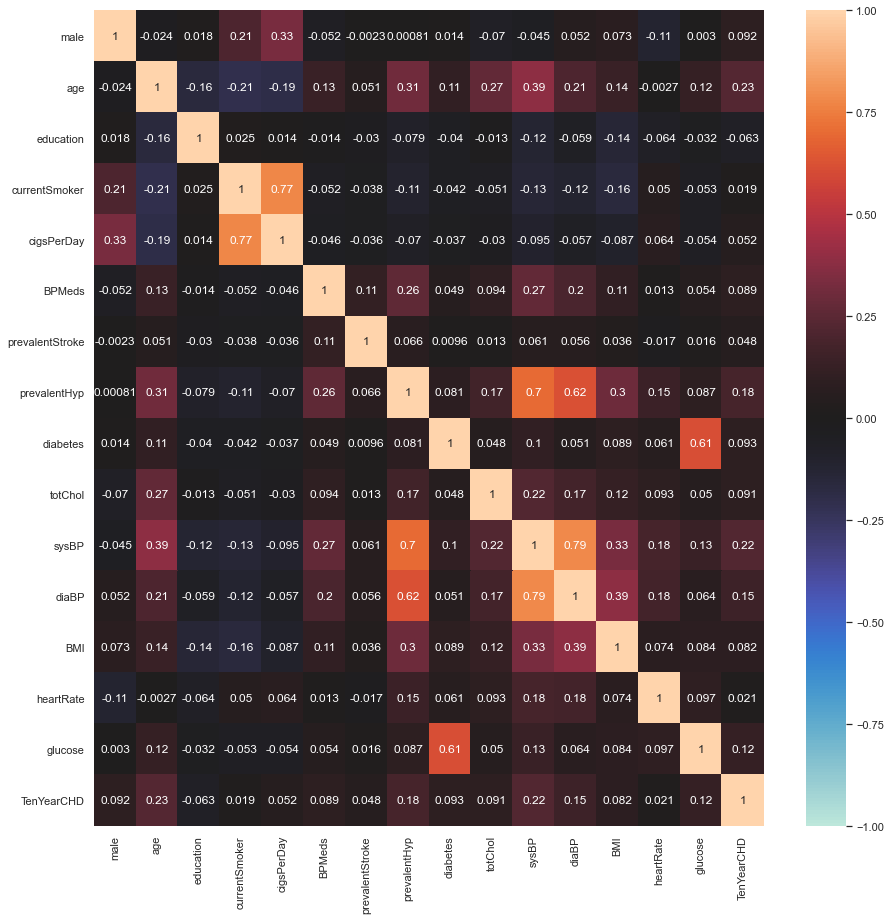

In [105]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0,ax=ax)

<p>We observe that</p>
<ul>
    <li>education has really less correlation with TenYearCHD</li>
    <li>systolic blood pressure and diastolic blood pressure are highly correlated</li>
    <li>current smoker and cigsper day are also highly correlated</li>
 </ul>
 
 

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sysBP', ylabel='diaBP'>

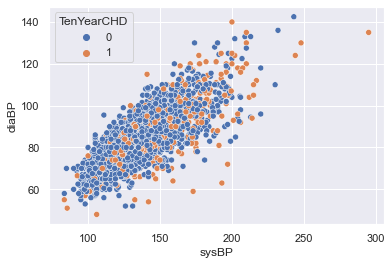

In [106]:
#checking the correlation using scatterplots
sns.scatterplot(df['sysBP'],df['diaBP'], hue=df['TenYearCHD'])

<p> But since systolic BP and diastolic BP is related to other groups like Prevalent Hyp, we keep them. </p>

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='currentSmoker', ylabel='cigsPerDay'>

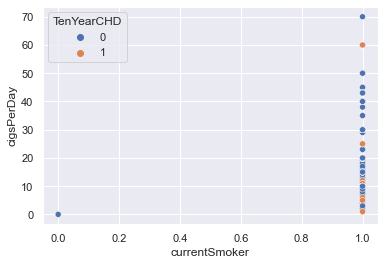

In [107]:
#checking the correlation using scatterplots
sns.scatterplot(df['currentSmoker'],df['cigsPerDay'],hue=df['TenYearCHD'])

In [108]:
#dropping currentSmoker, diastolic blood pressure and education attributes
df = df.drop(['currentSmoker','education'],axis=1)
df.shape

(3656, 14)

Let's see if we can remove more features using chi2 test

In [109]:
from sklearn.feature_selection import SelectKBest, chi2

x = df.iloc[:, :14]
y = df.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k=10).fit(x,y)
df_featurescores = pd.DataFrame(SelectKBest(score_func=chi2, k=10).fit(x,y).scores_)
df_columns= pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns,df_featurescores],axis=1)
feature_scores.columns = ['Attribute','Score']
feature_scores= feature_scores.sort_values(by='Score', ascending=False)
feature_scores

,Attribute,Score
13,TenYearCHD,3099.000000
8,sysBP,669.506552
12,glucose,379.583137
1,age,295.507761
7,totChol,249.153078
2,cigsPerDay,156.567318
9,diaBP,142.878574
5,prevalentHyp,82.967184
6,diabetes,31.027987
3,BPMeds,28.153003


HeartRate has the lowest score, so lets remove it

In [110]:
df = df.drop('heartRate',axis=1)

We are not dropping prevalentStroke because it has some correlation with TenYearCHD as well as sysBP, diaBP

In [111]:
df.describe()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,81.856127,0.152352
std,0.496883,8.561133,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,23.910128,0.359411
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,78.000000,0.000000
75%,1.000000,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,87.000000,0.000000
max,1.000000,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,394.000000,1.000000


In [112]:
features_list = feature_scores["Attribute"].tolist()[:12]
features_list

['TenYearCHD',
 'sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male',
 'BMI']

In [113]:
df.describe()
df = df.drop(df[df.totChol > 599].index)
df.shape

(3655, 13)

In [114]:
#Scaling the columns using Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)) 

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [115]:
#Splitting the dataframe into test and train samples

from sklearn.model_selection import train_test_split

x = df_scaled.drop(['TenYearCHD'], axis = 1)
y = df_scaled['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=29)

In [116]:
# Comparing how many people have risk of Heart Disease and how many does'nt

risk_count = df_scaled.TenYearCHD.value_counts()
print('People without Risk', risk_count[0])
print('People with Risk', risk_count[1])

People without Risk 3099
People with Risk 556


Proportion: 5.57 : 1


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


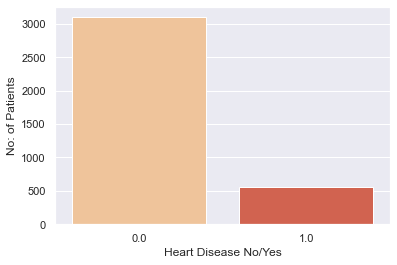

In [117]:
sns.set(style="darkgrid")
sns.countplot(df_scaled.TenYearCHD, palette="OrRd").set(xlabel="Heart Disease No/Yes", ylabel = "No: of Patients")
print('Proportion:', round(risk_count[0] / risk_count[1], 2), ': 1')

We need to perform undersampling to overcome the problems that might occur due to the skewed nature of our Data.

In [118]:
# df_shuffled = df_scaled.sample(frac=1,random_state=4)

# df_withCHD = df_shuffled.loc[df_shuffled['TenYearCHD'] == 1]

# df_withoutCHD = df_shuffled.loc[df_shuffled['TenYearCHD'] == 0].sample(n=560,random_state=42)

# normalized_df = pd.concat([df_withCHD, df_withoutCHD])

# sns.countplot(normalized_df.TenYearCHD, palette="OrRd").set(xlabel="Heart Disease No/Yes", ylabel = "No: of Patients")

In [119]:
normalized_df.TenYearCHD.value_counts()

0.0    560
1.0    556
Name: TenYearCHD, dtype: int64

## Sample model pipeline to choose the algorithm to use

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,accuracy_score

oversample = RandomOverSampler(sampling_strategy='minority')
y = df_scaled['TenYearCHD']
x = df_scaled.drop(['TenYearCHD'], axis = 1)
print(x.shape)
X_over, y_over = oversample.fit_resample(x, y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.35)
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
steps2 = [('under', RandomUnderSampler()), ('model', KNeighborsClassifier(4))]

pipeline = Pipeline(steps=steps)
pipeline2 = Pipeline(steps=steps2)
pipeline.fit(X_train,y_train)
pipeline2.fit(X_train,y_train)
pipepred = pipeline.predict(X_test)
pipepred2 = pipeline2.predict(X_test)

print(classification_report(y_test,pipepred))
print(classification_report(y_test,pipepred2))



# y_train = normalized_df['TenYearCHD']
# x_train = normalized_df.drop('TenYearCHD', axis=1)
# x_train.head()

# classifiers = [LogisticRegression(),SVC(),SVC(kernel='rbf'),DecisionTreeClassifier(),KNeighborsClassifier(2), GaussianNB()]

# for classifier in classifiers:
#     pipe = Pipeline(steps=[('classifier', classifier)])
#     pipe.fit(x_train, y_train)   
#     print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(x_test, y_test)*100)))


(3655, 12)
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      1068
         1.0       0.83      0.99      0.90      1102

    accuracy                           0.89      2170
   macro avg       0.91      0.89      0.89      2170
weighted avg       0.91      0.89      0.89      2170

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      1068
         1.0       0.78      0.80      0.79      1102

    accuracy                           0.78      2170
   macro avg       0.78      0.78      0.78      2170
weighted avg       0.78      0.78      0.78      2170



#### We see that kNN and Naive Bayes are the better options. Let's choose that

# Implementing models separately and checking their performance metrics

## Logistic Regression

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

log_reg_df = LogisticRegression().fit(x_train,y_train)
log_reg_prediction_df = log_reg_df.predict(x_test)

acc = accuracy_score(y_test, log_reg_prediction_df)
print("The accuracy score for Logistic Regression is:", round(acc,3)*100)

f1 = f1_score(y_test, log_reg_prediction_df)
print("The f1 score for Logistic Regression is:", round(f1,3)*100)

precision = precision_score(y_test, log_reg_prediction_df)
print("The precision score for Logistic Regression is:", round(precision,3)*100)

recall = recall_score(y_test, log_reg_prediction_df)
print("The recall score for Logistic Regression is:", round(recall,3)*100)

## Decision Tree

In [ ]:
dec_tree_df= DecisionTreeClassifier().fit(x_train,y_train)
dec_tree_prediction_df = dec_tree_df.predict(x_test)

acc = accuracy_score(y_test, dec_tree_prediction_df)
print("The accuracy score for Decision Tree Classifier is:", round(acc,3)*100)

f1 = f1_score(y_test, dec_tree_prediction_df)
print("The f1 score for Decision Tree Classifier is:", round(f1,3)*100)

precision = precision_score(y_test, dec_tree_prediction_df)
print("The precision score for Decision Tree Classifier is:", round(precision,3)*100)

recall = recall_score(y_test, dec_tree_prediction_df)
print("The recall score for Decision Tree Classifier is:", round(recall,3)*100)

## SVM

In [ ]:
svm_df= SVC().fit(x_train,y_train)
svm_prediction_df = svm_df.predict(x_test)

acc = accuracy_score(y_test, svm_prediction_df)
print("The accuracy score for Support Vector Machine classifier is:", round(acc,3)*100)

f1 = f1_score(y_test, svm_prediction_df)
print("The f1 score for Support Vector Machine classifier is:", round(f1,3)*100)

precision = precision_score(y_test, svm_prediction_df)
print("The precision score for Support Vector Machine classifier is:", round(precision,3)*100)

recall = recall_score(y_test, svm_prediction_df)
print("The recall score for Support Vector Machine classifier is:", round(recall,3)*100)

## Naives Bayes Approach

In [ ]:
NB_df = GaussianNB().fit(x_train,y_train)
NB_prediction_df = NB_df.predict(x_test)

acc = accuracy_score(y_test, NB_prediction_df)
print("The accuracy score for Naive Bayes Classifier is:", round(acc,3)*100)

f1 = f1_score(y_test, NB_prediction_df)
print("The f1 score for Naive Bayes Classifier is:", round(f1,3)*100)

precision = precision_score(y_test, NB_prediction_df)
print("The precision score for Naive Bayes Classifier is:", round(precision,3)*100)

recall = recall_score(y_test, NB_prediction_df)
print("The recall score for Naive Bayes Classifier is:", round(recall,3)*100)

## kNN Classifier

To find k (number of nearest neighbours to compare to) :

In [ ]:
for i in range(2,20):
    kNN_df = KNeighborsClassifier(i).fit(x_train,y_train)
    kNN_prediction_df = kNN_df.predict(x_test)
    acc = accuracy_score(y_test, kNN_prediction_df)
    print("The accuracy score for kNN Classifier is:", round(acc,3)*100)

Hence for k=2, we get maximum accuracy of 80.2%

In [ ]:
kNN_df = KNeighborsClassifier(2).fit(x_train,y_train)
kNN_prediction_df = kNN_df.predict(x_test)

acc = accuracy_score(y_test, kNN_prediction_df)
print("The accuracy score for kNN Classifier is:", round(acc,3)*100)

f1 = f1_score(y_test, kNN_prediction_df)
print("The f1 score for kNN Classifier is:", round(f1,3)*100)

precision = precision_score(y_test, kNN_prediction_df)
print("The precision score for kNN Classifier is:", round(precision,3)*100)

recall = recall_score(y_test, kNN_prediction_df)
print("The recall score for kNN Classifier is:", round(recall,3)*100)

### Since we have a better combination of accuracy, recall and f1 score for kNN Classifier thanNaive Bayes classifier, we choose the kNN Model

### Cross validating the results using 5-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_result = cross_val_score(kNN_df, x, y, cv=5) 

print ("Cross-validated scores:", cross_val_result)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cross_val_result.mean() * 100))

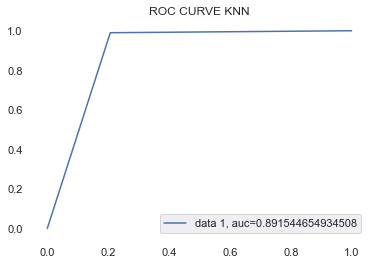

The score for the AUC ROC Curve is: 89.2%


In [124]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# fpr, tpr, _= roc_curve(y_test,kNN_prediction_df)
# auc = roc_auc_score(y_test, kNN_prediction_df)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.box(False)
# plt.title ('ROC CURVE KNN')
# plt.show()
fpr, tpr, _= roc_curve(y_test,pipepred)
auc = roc_auc_score(y_test, pipepred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")